In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

Load dataset from CSV file

In [2]:
Battary_RUL = pd.read_csv('Battery_RUL.csv')
Battary_RUL.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


Define feature names and target variable

In [3]:
feature_names = ['Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)']
target_name = 'RUL'

Discretize the target variable into bins (you can adjust the bins based on your data)

In [4]:
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5']
Battary_RUL['RUL'] = pd.cut(Battary_RUL['RUL'], bins=bins, labels=labels)

Convert target variable to numerical labels

In [5]:
le = LabelEncoder()
Battary_RUL['RUL'] = le.fit_transform(Battary_RUL['RUL'])

Split dataset into features and target variable

In [6]:
X = Battary_RUL[feature_names]
y = Battary_RUL[target_name]

In [7]:
X

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82
1,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35
2,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38
3,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81
4,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65
...,...,...,...,...,...,...,...
15059,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88
15060,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38
15061,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12
15062,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62


In [8]:
y

0        4
1        4
2        4
3        4
4        4
        ..
15059    0
15060    0
15061    0
15062    0
15063    5
Name: RUL, Length: 15064, dtype: int32

training The Model

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)

Calculate and print accuracy

In [10]:
accuracy = accuracy_score(y_test, y_predictions)
print('Accuracy: {:.2%}'.format(accuracy))


Accuracy: 96.35%


Calculate Gini impurity and total Gini impurity for each node

In [11]:
def calculate_gini_impurity(tree, node_id):
    return tree.impurity[node_id]

def calculate_total_gini_impurity(tree):
    return sum(calculate_gini_impurity(tree, node_id) * tree.n_node_samples[node_id] / len(y_train) for node_id in range(tree.node_count))
print("Gini impurity of each node:")
for node_id in range(model.tree_.node_count):
    print("{:.4f}".format(calculate_gini_impurity(model.tree_, node_id)))

total_gini_impurity = calculate_total_gini_impurity(model.tree_)
print("\nTotal Gini impurity: {:.4f}".format(total_gini_impurity))

Gini impurity of each node:
0.3253
0.7922
0.6968
0.3031
0.2266
0.1244
0.0000
0.5000
0.0000
0.0000
0.0000
0.1682
0.4898
0.2778
0.4444
0.0000
0.0000
0.0000
0.3457
0.2188
0.0000
0.0000
0.0000
0.0740
0.0169
0.0000
0.2188
0.5000
0.0000
0.0000
0.0000
0.4260
0.0000
0.3750
0.5000
0.0000
0.0000
0.0000
0.7136
0.4916
0.5290
0.0713
0.0000
0.0000
0.3629
0.1975
0.0000
0.0000
0.2160
0.5000
0.0000
0.5000
0.0000
0.0000
0.0726
0.4444
0.0000
0.0000
0.0000
0.3156
0.4592
0.1800
0.0000
0.0000
0.0000
0.2261
0.0460
0.5000
0.0000
0.0000
0.0000
0.6537
0.5950
0.2778
0.5000
0.0000
0.0000
0.0000
0.5600
0.0000
0.5000
0.0000
0.0000
0.3750
0.0000
0.4444
0.0000
0.0000
0.7395
0.6857
0.1694
0.5000
0.0000
0.0000
0.0000
0.6762
0.6502
0.4912
0.1884
0.0000
0.0000
0.4227
0.0000
0.3515
0.0000
0.2765
0.2438
0.4845
0.3191
0.1454
0.0000
0.4898
0.0000
0.0000
0.0000
0.0000
0.0761
0.5000
0.0000
0.0000
0.0400
0.0000
0.3457
0.0000
0.0000
0.0000
0.7742
0.0000
0.7148
0.6910
0.4614
0.0000
0.1653
0.0000
0.0000
0.5538
0.0000
0.3788
0.6250

Calculate and print Sensitivity, Precision, Recall, F-measure

In [12]:
report = classification_report(y_test, y_predictions, target_names=[str(label) for label in le.classes_])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        Bin1       0.91      0.87      0.89       143
        Bin2       0.85      0.79      0.82       136
        Bin3       0.85      0.90      0.88       136
        Bin4       0.83      0.85      0.84       145
        Bin5       0.99      0.99      0.99      2448
         nan       0.83      1.00      0.91         5

    accuracy                           0.96      3013
   macro avg       0.87      0.90      0.89      3013
weighted avg       0.96      0.96      0.96      3013



Confusion Matrix

In [13]:
conf_matrix = confusion_matrix(y_test, y_predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 124   13    3    0    3    0]
 [  11  107    7    4    7    0]
 [   1    3  123    5    4    0]
 [   1    1    5  123   15    0]
 [   0    2    7   17 2421    1]
 [   0    0    0    0    0    5]]


Validation using a separate validation set

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
y_val_predictions = model.predict(X_val)

Calculate and print Sensitivity, Precision, Recall, F-measure for validation set

In [15]:
val_report = classification_report(y_val, y_val_predictions, target_names=[str(label) for label in le.classes_])
print("Validation Classification Report:\n", val_report)

Validation Classification Report:
               precision    recall  f1-score   support

        Bin1       0.92      0.90      0.91        68
        Bin2       0.87      0.75      0.81        61
        Bin3       0.84      0.94      0.88        65
        Bin4       0.82      0.90      0.86        62
        Bin5       0.99      0.99      0.99      1248
         nan       1.00      1.00      1.00         2

    accuracy                           0.97      1506
   macro avg       0.91      0.91      0.91      1506
weighted avg       0.97      0.97      0.97      1506



Confusion Matrix for validation set

In [16]:
val_conf_matrix = confusion_matrix(y_val, y_val_predictions)
print("Validation Confusion Matrix:\n", val_conf_matrix)

Validation Confusion Matrix:
 [[  61    5    2    0    0    0]
 [   4   46    4    4    3    0]
 [   1    1   61    1    1    0]
 [   0    0    3   56    3    0]
 [   0    1    3    7 1237    0]
 [   0    0    0    0    0    2]]


Visualize the decision tree in the terminal

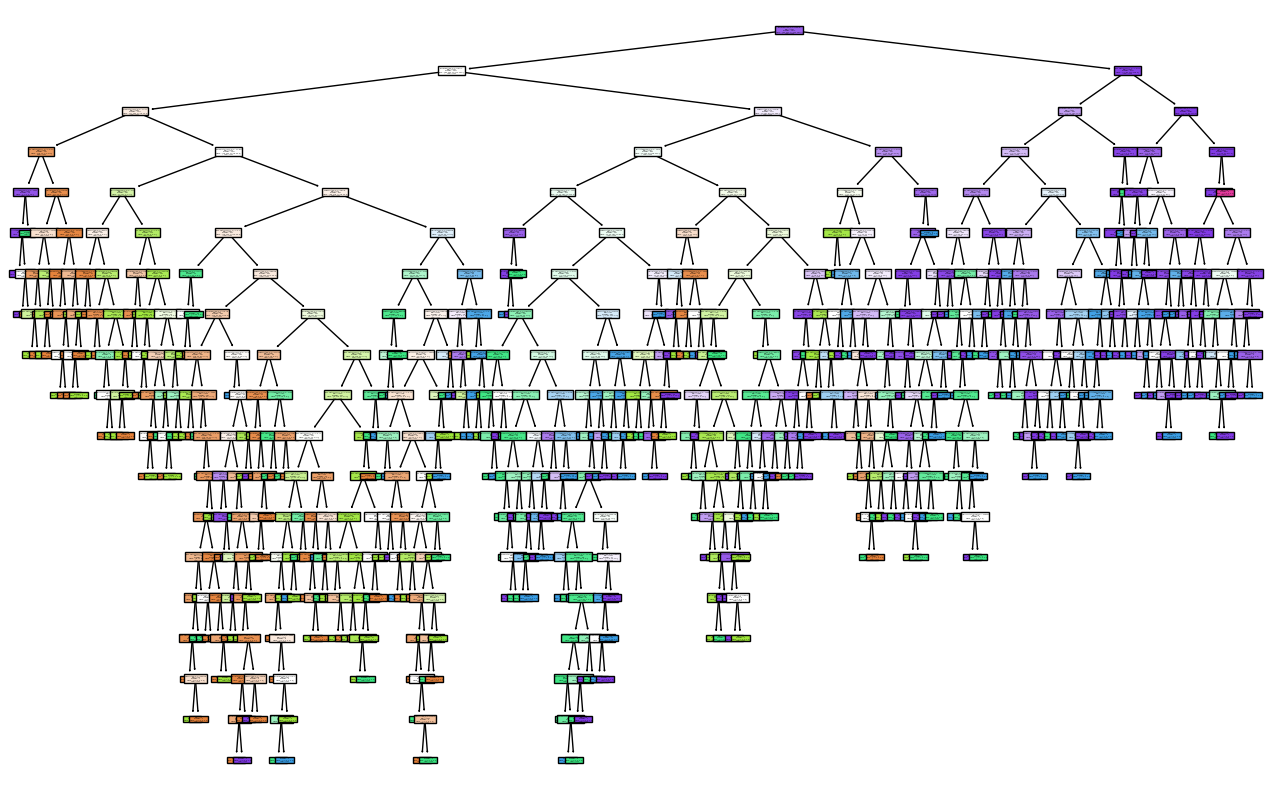

In [17]:
plt.figure(figsize=(16, 10))
plot_tree(model, feature_names=feature_names, class_names=[str(label) for label in le.classes_], filled=True)
plt.show()